# Heart Disease ML Project
- 팀원1 : 30102 이예령
- 팀원2 : 30112 박재범

## 1. 주제
- 질문 0 : 이 데이터는 어떤 구조로 이루어져 있고, 변수들 간의 상관관계는 어떠한가? (Heart Disease EDA)
- 질문 1 : 이 데이터 전처리를 위해서는 어떤 알고리즘과 기법을 사용해야 하는가? 
- 질문 2 : 어떤 알고리즘이 심장병을 예측하는데 가장 알맞은가?
- 질문 3 : 추가적으로 알고리즘의 성능을 향상시키려면 어떻게 해야 하는가?

## 2. 데이터 수집
- 데이터 수집 방법 : 데이터 사이언스 커뮤니티(Kaggle)에서 평소 관심을 가진 데이터셋 사용
- 데이터 수집 사이트 : https://www.kaggle.com/ronitf/heart-disease-uci

## 3. 역할 분배 
- 30102 이예령 : 데이터 수집, 코드 작성, 발표 (PCA 알고리즘), 보고서 작성 
- 30112 박재범 : 코드 작성, 발표 (KNN 알고리즘), 보고서 작성

In [1]:
# 라이브러리, 데이터 가져오기

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as cm
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

df = pd.read_csv('heart.csv')
warnings.filterwarnings(action='ignore')

In [2]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

- 변수 설명

#### age : 나이
#### sex : 성별 (0 : 여성, 1 : 남성)
#### cp : 흉통 유형 (0 : 증상 없음, 1 : 비전형적 협심증, 2 : 비협심증 통증, 3 : 전형적인 협심증)
#### trestbps : 안정된 평상시 혈압
#### chol : 혈중 콜레스테롤 농도
#### fbs : 공복시 혈당 > 120mg/dl (0 : False, 1 : True)
#### restecg : 안정 심전도 결과 (0 : 좌심실 비대, 1: 정상, 2 : ST-T파 비정상)
#### thalach : 최대 심장 박동 수
#### exang : 협심증 유발 운동 (0 : No, 1 : Yes)
#### oldpeak : 안정되기까지 운동으로 유발되는 ST
#### slope : ST의 최대 기울기 (0 : 하강, 1 : 평면, 2 : 상승) - 급성 심근경색 유발 요소
#### ca : 형광 투시된 주요 혈관의 수 (0~3)
#### thal : 결함 (1 : 고정된 결함, 2 : 정상, 3: 가역적 결함)
#### target : 심장병 진단 (0 : False, 1 : True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# ca = 4, thal = 0은 잘못된 데이터이므로 평균값 넣고 자료형 맞춰주기

df.loc[df['ca'] == 4, 'ca'] = np.NaN
df.loc[df['thal'] == 0, 'thal'] = np.NaN
df = df.fillna(df.median())
df = df.astype({'ca' : 'int', 'thal' : 'int'})

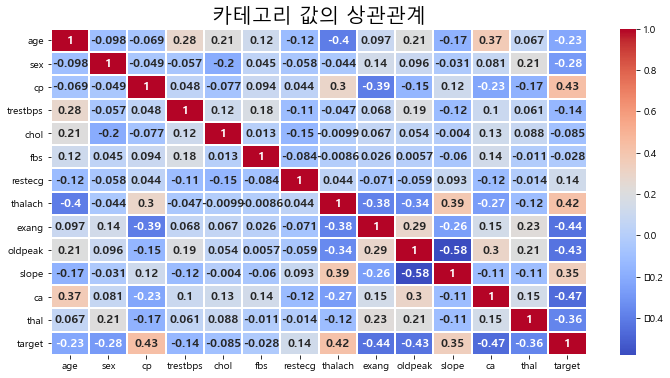

In [8]:
# 두 카테고리 값에 대한 값 변화를 알기 위해 heatmap 사용

plt.figure(figsize=(12, 6))
plt.title("카테고리 값의 상관관계", fontsize = 20)
sns.heatmap(df.corr(), annot = True, linewidths = 1, 
            annot_kws = {'size' : 12, 'weight' : 'bold'}, cmap = 'coolwarm')
plt.show()

In [9]:
# 데이터 할당 - X : feature, y : target

X = df.iloc[:,0:13].values
y = df.iloc[:,-1].values

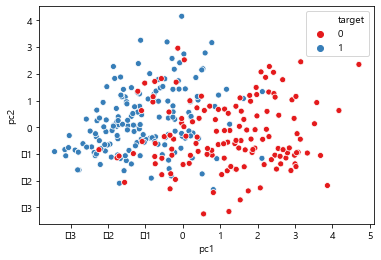

In [10]:
# 표준 정규 분포로 스케일링
# PCA 이용하여 2차원으로 시각화

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

StandardScaler = StandardScaler()

X_scaled = StandardScaler.fit_transform(X)

pca = PCA(n_components=2)
pca_df = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data = pca_df, columns=['pc1', 'pc2'])

sns.scatterplot(x='pc1', y='pc2', hue=df['target'], 
                data=pca_df, palette = 'Set1')
plt.show()

In [11]:
# pca로 축소시킨 데이터 할당 - X : feature, y : target
# 데이터 세트 분리

from sklearn.model_selection import train_test_split


X = pca_df.iloc[:,0:13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state = 0)

train_accurancy = {}
test_accurancy = {}

In [12]:
# ML 알고리즘 학습, 예측
# 정확도, 분류 성능 평가 지표 시각화
# 반복적인 작업이므로 함수화 후 함수 사용

from sklearn.metrics import confusion_matrix

def Algorithms(name, X_train, y_train, X_test, y_test, fullname):
    name.fit(X_train, y_train)
    name_predict = name.predict(X_test)
    name_cm = confusion_matrix(y_test, name_predict)

    train_acc = name.score(X_train, y_train)*100
    test_acc = name.score(X_test, y_test)*100
    

    train_accurancy[fullname] = train_acc
    test_accurancy[fullname] = test_acc
    
    acc = ['train_acc', 'test_acc']
    name_acc = []
    name_acc.append(train_acc)
    name_acc.append(test_acc)
    
    
    if(abs(name_acc[0]-name_acc[1]) < 1) :
        acc_y = (round(min(name_acc[0], name_acc[1])-2, 0), 
                 round(max(name_acc[0], name_acc[1])+1, 0))
    
    elif(abs(name_acc[0]-name_acc[1]) < 5) :
        acc_y = (round(min(name_acc[0], name_acc[1])-5, 0), 
                 round(max(name_acc[0], name_acc[1])+5, 0))
        
    else :
        acc_y = (round(min(name_acc[0], name_acc[1])-15, 0), 
                 round(max(name_acc[0], name_acc[1])+15, 0))

    figure, ax = plt.subplots(figsize = (12, 5), ncols = 2)
    colors = ['Skyblue', 'Pink']
    
    bar = ax[0].bar(acc, name_acc, width=0.5, color=colors)
    ax[0].set_ylim(acc_y) 
    ax[0].set_title(fullname+" Accurancy", fontsize = 15)

    
    for i, b in enumerate(bar):
        ax[0].text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.03, 
                   round(name_acc[i], 3), ha='center', va='bottom', fontsize=13)


    plt.title(fullname+" Confusion matrix", fontsize = 15)
    sns.heatmap(name_cm/np.sum(name_cm), annot=True, linewidths = 1, 
                annot_kws = {'size' : 12, 'weight' : 'bold'}, fmt='.2%', 
                cmap = 'Blues', ax = ax[1])

    plt.show()

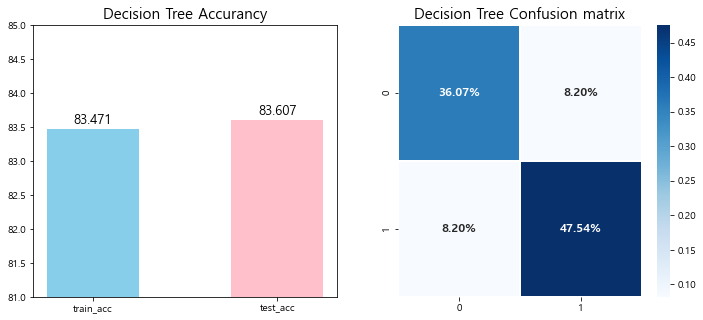

In [13]:
# 결정 트리

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4, random_state=0)
Algorithms(dtc, X_train, y_train, X_test, y_test, 'Decision Tree')

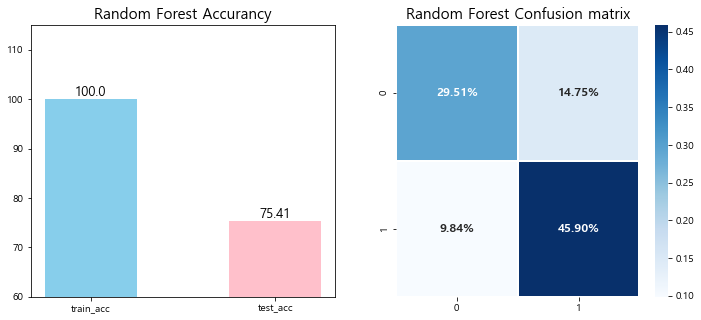

In [14]:
# 랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
Algorithms(rf, X_train, y_train, X_test, y_test, 'Random Forest')

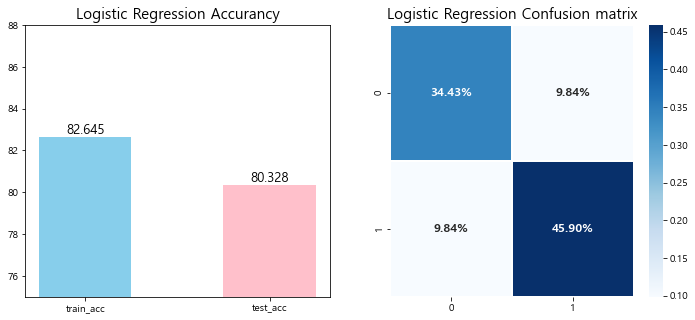

In [15]:
# 로지스틱 회귀

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
Algorithms(lr, X_train, y_train, X_test, y_test, 'Logistic Regression')

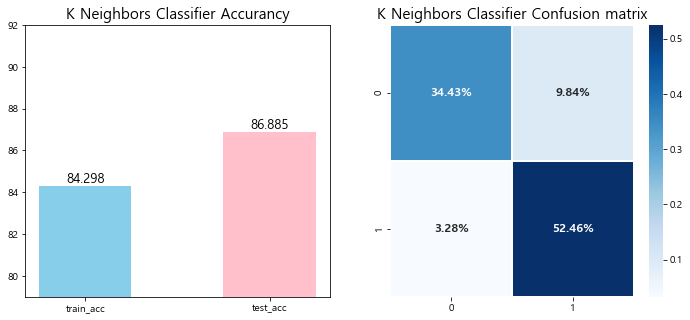

In [16]:
# k-최근접 이웃 

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)  
Algorithms(knn, X_train, y_train, X_test, y_test, 'K Neighbors Classifier')

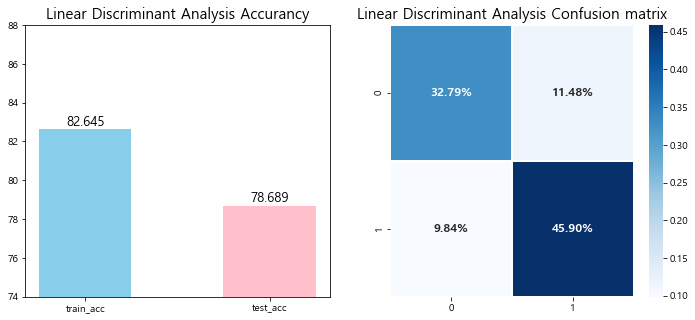

In [17]:
# 선형 판별 분석

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis() 
Algorithms(lda, X_train, y_train, X_test, y_test,'Linear Discriminant Analysis')

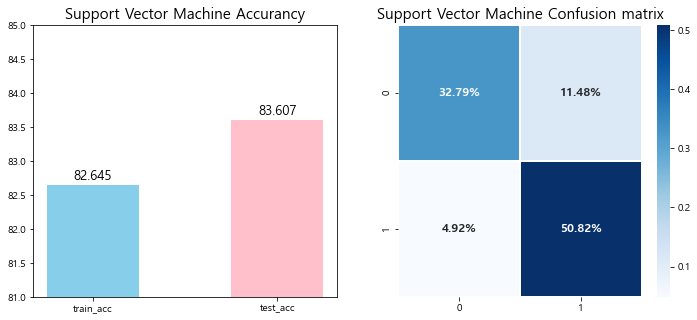

In [18]:
# 서포트 벡터 머신

from sklearn.svm import SVC

svm = SVC(random_state = 1)  
Algorithms(svm, X_train, y_train, X_test, y_test, 'Support Vector Machine')

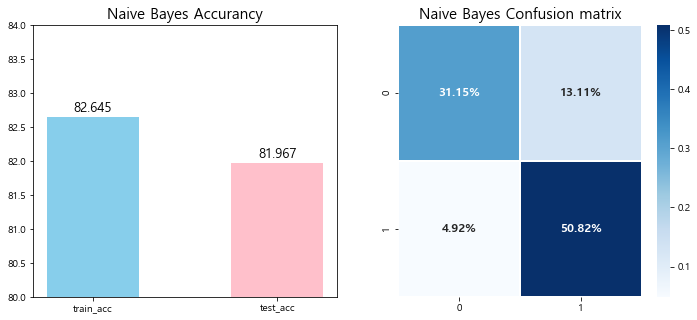

In [19]:
# 나이브 베이즈

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()  
Algorithms(nb, X_train, y_train, X_test, y_test, 'Naive Bayes')

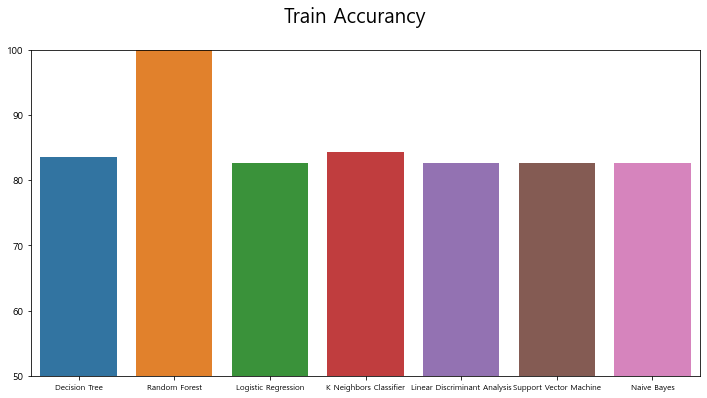

In [20]:
# 훈련 데이터 정확도 시각화

figure = plt.subplots(figsize = (12, 6))
plt.suptitle("Train Accurancy", fontsize = 20)
sns.barplot(x=list(train_accurancy.keys()), y=list(train_accurancy.values()))
plt.xticks(fontsize='8')
plt.ylim([50, 100])
plt.show()

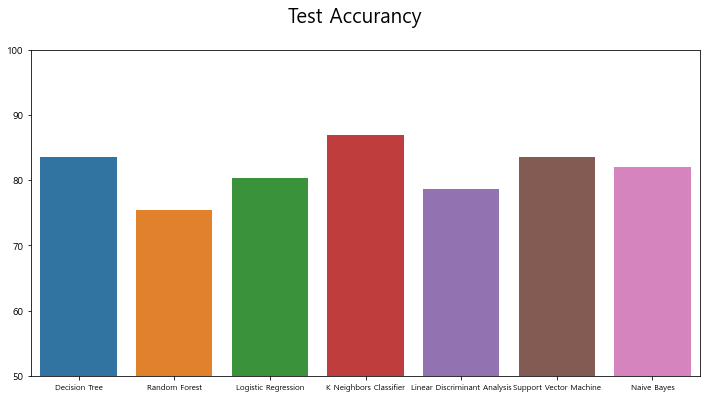

In [21]:
# 테스트 데이터 정확도 시각화

figure = plt.subplots(figsize = (12, 6))
plt.suptitle("Test Accurancy", fontsize = 20)
sns.barplot(x=list(test_accurancy.keys()), y=list(test_accurancy.values()))
plt.xticks(fontsize='8')
plt.ylim([50, 100])
plt.show()

In [22]:
# GridSearchCV 사용으로 최적의 파라미터 값 찾기

from sklearn.model_selection import GridSearchCV

g_rf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state = 0)
parameters = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

grid_rf = GridSearchCV(g_rf, param_grid=parameters, cv=3, refit=True)
grid_rf.fit(X_train, y_train)

print('가장 적절한 파라미터 값: {}'.format(grid_rf.best_params_))
print('최고 교차 검증 점수 : {}'.format(grid_rf.best_score_))

가장 적절한 파라미터 값: {'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 10}
최고 교차 검증 점수 : 0.8222222222222223


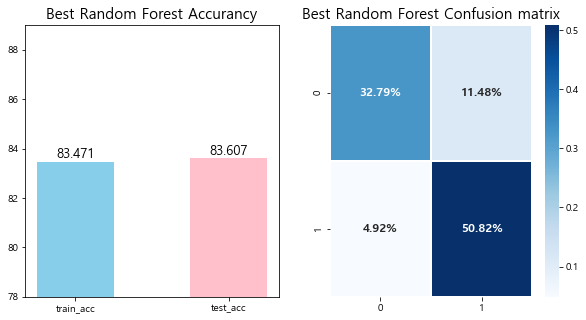

In [23]:
# 최적의 파라미터를 이용한 랜덤 포레스트

best = grid_rf.best_estimator_
best_predict = best.predict(X_test)

best_cm = confusion_matrix(y_test, best_predict)

train_acc = best.score(X_train, y_train)*100
test_acc = best.score(X_test, y_test)*100
    
train_accurancy['Best Random Forest'] = train_acc    
test_accurancy['Best Random Forest'] = test_acc
    
acc = ['train_acc', 'test_acc']
best_acc = []
best_acc.append(train_acc)
best_acc.append(test_acc)

acc_y = (round(min(best_acc[0], best_acc[1])-5, 0), 
                 round(max(best_acc[0], best_acc[1])+5, 0))
    
figure, ax = plt.subplots(figsize = (10, 5), ncols = 2)
colors = ['Skyblue', 'Pink']
    
bar = ax[0].bar(acc, best_acc, width=0.5, color=colors)
ax[0].set_ylim(acc_y) 
ax[0].set_title("Best Random Forest Accurancy", fontsize = 15)
    
for i, b in enumerate(bar):
    ax[0].text(b.get_x()+b.get_width()*(1/2),b.get_height()+0.03, 
               round(best_acc[i], 3), ha='center', va='bottom', fontsize=13)


plt.title("Best Random Forest Confusion matrix", fontsize = 15)
sns.heatmap(best_cm/np.sum(best_cm), annot=True, linewidths = 1, 
                annot_kws = {'size' : 12, 'weight' : 'bold'}, fmt='.2%', 
                cmap = 'Blues', ax = ax[1])

plt.show()

- 질문 1 : 이 데이터 전처리를 위해서는 어떤 알고리즘과 기법을 사용해야 하는가?
- 답변 1 : feature의 개수가 많아서 feature을 줄이고, 분산을 최대로 유지하면서 데이터를 특정 차원으로 축소시키는 PCA를 사용

- 질문 2 : 어떤 알고리즘이 심장병을 예측하는데 가장 알맞은가?
- 답변 2 : k-nn이 테스트 데이터에서 86.9%로 가장 정확도가 높았다.

- 질문 3 : 추가적으로 정확도를 향상시키려면 어떻게 해야 하는가?
- 답변 3 : 데이터의 크기가 작아서 정확도가 높지 않았다는 생각이 들고, RandomForest와 같이 overfitting이 일어난 경우 최적의 파라미터 값을 찾아 다시 모델링을 진행해본다.